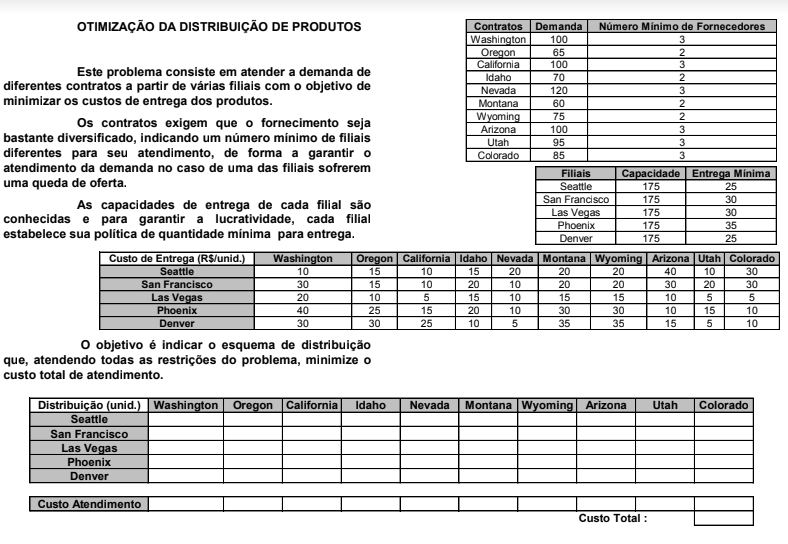

# Modelagem Matemática do Problema: 

X[i][j]= Quantidade de Produtos da Cidade i para o Contrato j, i=1,..5,  j=1,...,10 in inteiro >=0 

Y[i][j] = variável de contagem, yij=1 se e somente se xij>0 e yij=0 caso  contrário em `{0,1} `


Ou seja, teremos:

Demanda de Washington: x[1][1]+x[2][1]+x[3][1]+x[4][1]+x[5][1]=100

Variável de contagem em Wa: y[1][1]+y[2][1]+y[3][1]+y[4][1]+y[5][1]>=3

Demanda de Oregon: x[1][2]+x[2][2]+x[3][2]+x[4][2]+x[5][2]=65

Variável de contagem em O: y[1][2]+y[2][2]+y[3][2]+y[4][2]+y[5][2]>=2

Demanda de Califórnia: x[1][3]+x[2][3]+x[3][3]+x[4][3]+x[5][3]=100 

Variável de contagem em C: y[1][3]+y[2][3]+y[3][3]+y[4][3]+y[5][3]>=3

Demanda de Idaho:  x[1][4]+x[2][4]+x[3][4]+x[4][4]+x[5][4]=70

Variável de contagem em I: y[1][4]+y[2][4]+y[3][4]+y[4][4]+y[5][4]>=2

Demanda de Nevada: x[1][5]+x[2][5]+x[3][5]+x[4][5]+x[5][5]=120

Variável de contagem em N: y[1][5]+y[2][5]+y[3][5]+y[4][5]+y[5][5]>=3

Demanda de Montana:  x[1][6]+x[2][6]+x[3][6]+x[4][6]+x[5][6]=60

Variável de contagem em M: y[1][6]+y[2][6]+y[3][6]+y[4][6]+y[5][6]>=2

Demanda de Wyoming:  x[1][7]+x[2][7]+x[3][7]+x[4][7]+x[5][7]=75

Variável de contagem em Wy: y[1][7]+y[2][7]+y[3][7]+y[4][7]+y[5][7]>=2

Demanda de Arizona:  x[1][8]+x[2][8]+x[3][8]+x[4][8]+x[5][8]=100

Variável de contagem em A: y[1][8]+y[2][8]+y[3][8]+y[4][8]+y[5][8]>=3

Demanda de Utah:  x[1][9]+x[2][9]+x[3][9]+x[4][9]+x[5][9]=95

Variável de contagem em U: y[1][9]+y[2][9]+y[3][9]+y[4][9]+y[5][9]>=3

Demanda de Colorado:  x[1][10]+x[2][10]+x[3][10]+x[4][10]+x[5][10]=85

Variável de contagem em C: y[1][10]+y[2][10]+y[3][10]+y[4][10]+y[5][10]>=3

Capacidade de Seatle: x[1][1]+x[1][2]+x[1][3]+x[1][4]+x[1][5]x[1][6]+x[1][7]+x[1][8]+x[1][9]+x[1][10]<=100

Entrega mínima de Seatle: x1j>=25 j=1,...10

Capacidade de San Francisco: x[2][1]+x[2][2]+x[2][3]+x[2][4]+x[2][5]x[2][6]+x[2][7]+x[2][8]+x[2][9]+x[2][10]<=100

Entrega mínima de San Francisco: x2j>=25 j=1,...10

Capacidade de Las Vegas: x[3][1]+x[3][2]+x[3][3]+x[3][4]+x[3][5]x[3][6]+x[3][7]+x[3][8]+x[3][9]+x[3][10]<=100

Entrega mínima de Las Vegas: x3j>=25 j=1,...10

Capacidade de Phoenix: x[4][1]+x[4][2]+x[4][3]+x[4][4]+x[4][5]x[4][6]+x[4][7]+x[4][8]+x[4][9]+x[4][10]<=100

Entrega mínima de Phoenix: x4j>=25 j=1,...10

Capacidade de Denver: x[5][1]+x[5][2]+x[5][3]+x[5][4]+x[5][5]x[5][6]+x[5][7]+x[5][8]+x[5][9]+x[5][10]<=100

Entrega mínima de Denver: x5j>=25 j=1,...10

y[i][j] = 1 se x[i][j] > 0

x[i][j] >= 0

In [1]:
%pip install numpy
%pip install pulp

import numpy as np
import pulp

     |████████████████████████████████| 40.6MB 99kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amply: filename=amply-0.1.2-cp36-none-any.whl size=16573 sha256=696b7f5efd926cf8b30c40e03c88cb5b1cab4355343adadb08c1191242c33955
  Stored in directory: /root/.cache/pip/wheels/84/18/f7/e5c3ed13ed5bb721763f77d4a924331d59ef115ce61c9d26eb
Successfully built amply


In [ ]:
#Pela primeira tabela, teremos a demanda e o número mínimo de fornecedores:
demanda = [100, 65, 100, 70, 120, 60, 75, 100, 95, 85]
min_fornecedores = [3, 2, 3, 2, 3, 2, 2, 3, 3, 3]
#Note que são aplicadas para 10 locais (Washington, Oregon, Califórnia, Idaho, Nevada, Montana, Wyoming, Arizona, Utah, Colorado)

#Pela segunda tabela, teremos a entrega mínima de cada equação é dada por:
ent_min = [25, 30, 30, 35, 25] 
#Note que são aplicadas para 5 cidades (Seattle, San Francisco, Las Vegas, Phoenix, Denver)

#Custos de cada uma das entregas
custo = [       #Destino
         # 0  1  2  3  4  5  6  7  8  9 
         [10,15,10,15,20,20,20,40,10,30], #0   
         [30,15,10,20,10,20,20,30,20,30], #1
         [20,10, 5,15,10,15,15,10, 5, 5], #2     Origem
         [40,25,15,20,10,30,30,10,15,10], #3
         [30,30,25,10, 5,35,35,15, 5,10]  #4
         ]

#Nomes das origens
Origem = ["Seattle", "San Francisco", "Las Vegas", "Phoenix", "Denver"]

#Nomes dos destinos
Destino = ["Washington", "Oregon", "California", "Idaho", "Nevada", "Montana", "Wyoming", "Arizona", "Utah", "Colorado"]


# Definindo o problema como de minimização
prob = pulp.LpProblem('Exercício da Lista 4', pulp.LpMinimize)

x = pulp.LpVariable.dicts('Investimento ',[(i,j)for i in range(0,5) for j in range(0,10)] ,lowBound=0, cat='Continuous')

y = pulp.LpVariable.dicts('y',[(i,j)for i in range(0,5) for j in range(0,10)] ,lowBound=0, cat='Binary')

#Função à ser minimizada
prob += pulp.lpSum([custo[i][j] * x[i,j] for i in range(0,5) for j in range(0,10)])

#Restrição à demanda dos destinos
for j in range(0,10):
  prob += pulp.lpSum([x[i,j] for i in range(0,5)]) == demanda[j] 

#Restrição ao numero mínimo de cada destino
for j in range(0,10):
  prob += pulp.lpSum([y[i,j] for i in range(0,5)]) >= min_fornecedores[j]

#Restrição à capacidade de cada origem
for i in range(0,5):
  prob += pulp.lpSum([x[i,j] for j in range(0,10)]) <= 175

#Restrição à número mínimo de cada origem
for i in range(0,5):
  for j in range(0,10): 
    prob += x[i,j] >= ent_min[i] * y[i,j]

#Restrição no relacionamento entre y e x
for j in range(0,10):
  for i in range (0,5):
    prob += x[i,j] <= 175 * y[i,j]

#escrevendo o problema de otimização linear
print(prob)

# Resolvendo o problema 
optimization_result = prob.solve()

# Verificando se a solução ótima foi encontrada
assert optimization_result == pulp.LpStatusOptimal

#mostrando o resultado
for i in range(0,5):
    for j in range(0,10): 
        if y[i,j].varValue == 1:
            print ("Investimento_( ", Origem[i], " , ", Destino[j], " ) = ", x[i,j].varValue, " unidades ")

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Exercício_da_Lista_4:
MINIMIZE
10*Investimento__(0,_0) + 15*Investimento__(0,_1) + 10*Investimento__(0,_2) + 15*Investimento__(0,_3) + 20*Investimento__(0,_4) + 20*Investimento__(0,_5) + 20*Investimento__(0,_6) + 40*Investimento__(0,_7) + 10*Investimento__(0,_8) + 30*Investimento__(0,_9) + 30*Investimento__(1,_0) + 15*Investimento__(1,_1) + 10*Investimento__(1,_2) + 20*Investimento__(1,_3) + 10*Investimento__(1,_4) + 20*Investimento__(1,_5) + 20*Investimento__(1,_6) + 30*Investimento__(1,_7) + 20*Investimento__(1,_8) + 30*Investimento__(1,_9) + 20*Investimento__(2,_0) + 10*Investimento__(2,_1) + 5*Investimento__(2,_2) + 15*Investimento__(2,_3) + 10*Investimento__(2,_4) + 15*Investimento__(2,_5) + 15*Investimento__(2,_6) + 10*Investimento__(2,_7) + 5*Investimento__(2,_8) + 5*Investimento__(2,_9) + 40*Investimento__(3,_0) + 25*Investimento__(3,_1) + 15*Investimento__(3,_2) + 20*Investimento__(3,_3) + 10*Investimento__(3,_4) + 30*Investimento__(3,_5) + 30*Investimento__(3,_6) + 10*Investi